<a href="https://colab.research.google.com/github/Hoteeman/projects/blob/main/EV_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn


In [11]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Read the uploaded file into a Pandas DataFrame
for filename in uploaded.keys():
    data = pd.read_csv(filename)

# Display the first few rows of the data
data.head()


Saving ev_charging_patterns.csv to ev_charging_patterns.csv


,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


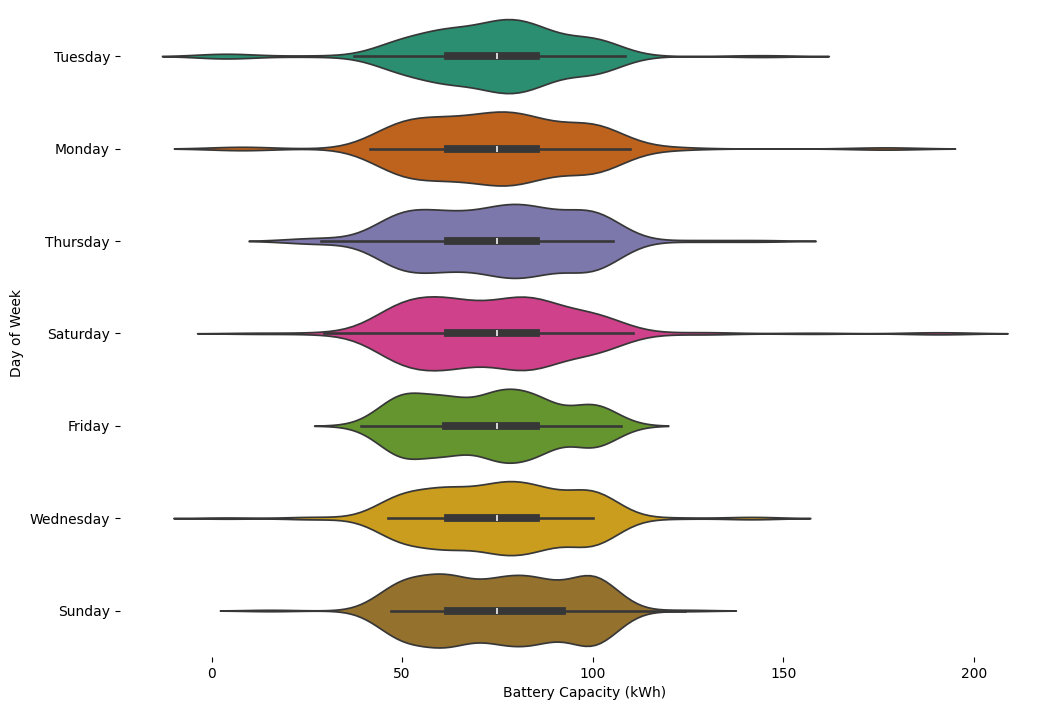

In [46]:
# @title Day of Week vs Battery Capacity (kWh)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Day of Week'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Battery Capacity (kWh)', y='Day of Week', hue='Day of Week', inner='box', palette='Dark2', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

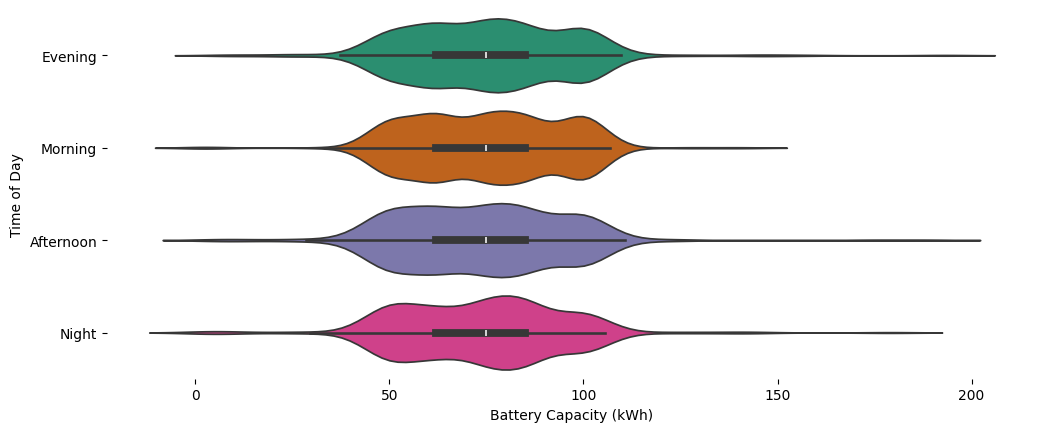

In [41]:
# @title Time of Day vs Battery Capacity (kWh)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Time of Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Battery Capacity (kWh)', y='Time of Day', hue='Time of Day', inner='box', palette='Dark2', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

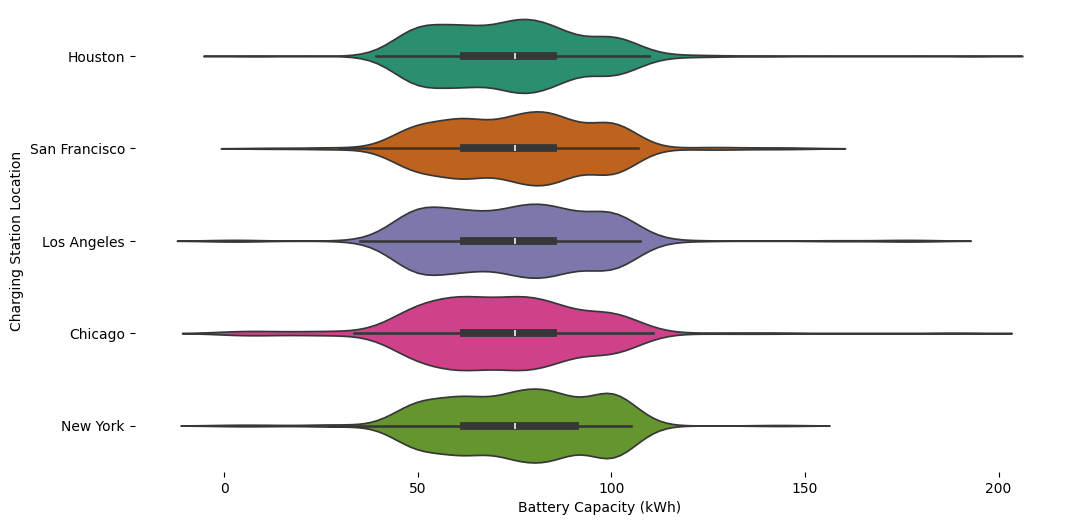

In [43]:
# @title Charging Station Location vs Battery Capacity (kWh)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Charging Station Location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Battery Capacity (kWh)', y='Charging Station Location', hue='Charging Station Location', inner='box', palette='Dark2', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

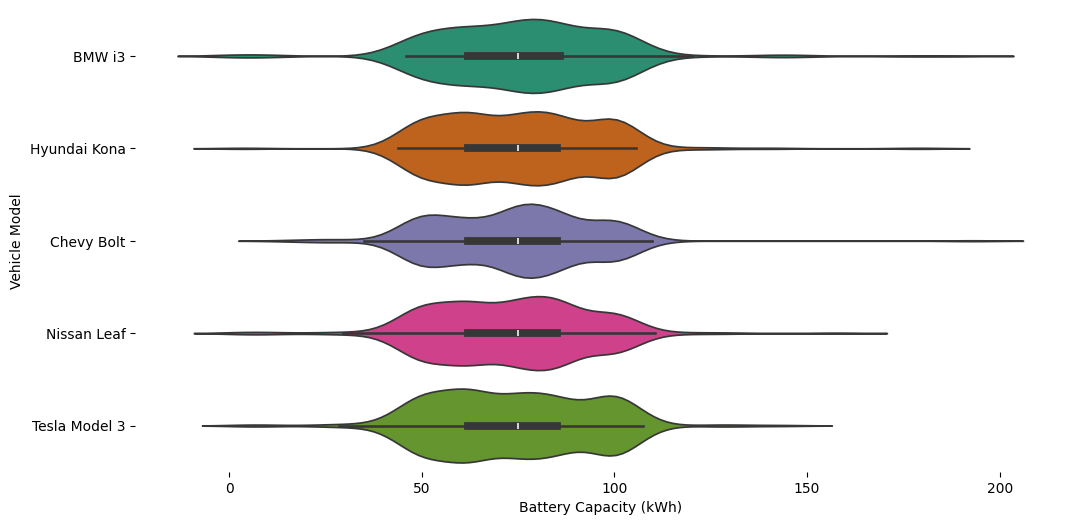

In [42]:
# @title Vehicle Model vs Battery Capacity (kWh)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Vehicle Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Battery Capacity (kWh)', y='Vehicle Model', hue='Vehicle Model', inner='box', palette='Dark2', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

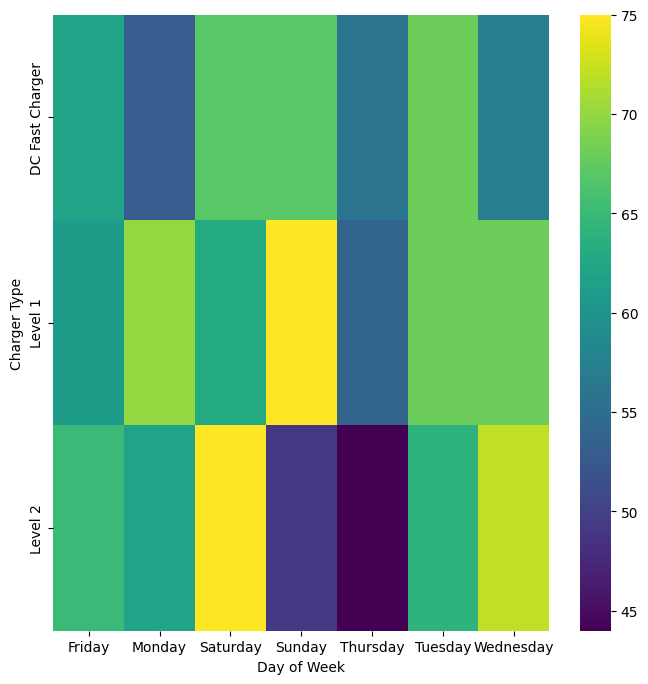

In [37]:
# @title Day of Week vs Charger Type

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Charger Type'].value_counts()
    for x_label, grp in data.groupby('Day of Week')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Day of Week')
_ = plt.ylabel('Charger Type')

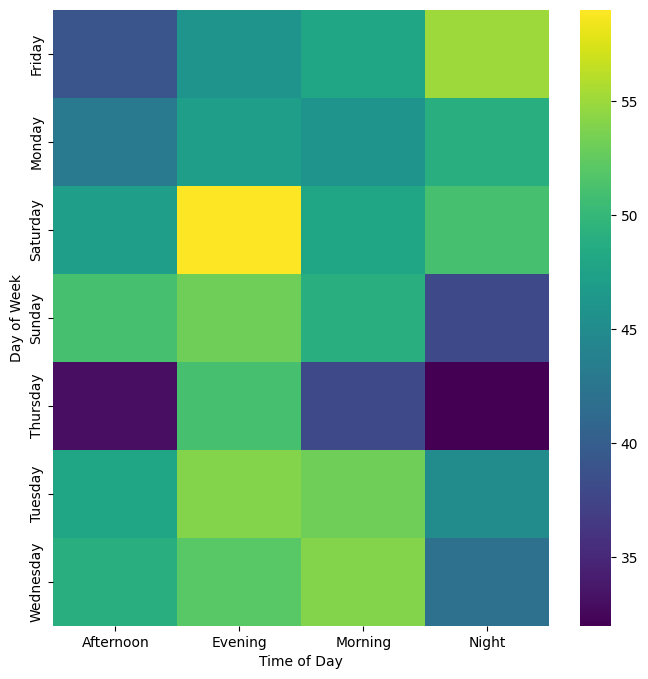

In [36]:
# @title Time of Day vs Day of Week

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Day of Week'].value_counts()
    for x_label, grp in data.groupby('Time of Day')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Time of Day')
_ = plt.ylabel('Day of Week')

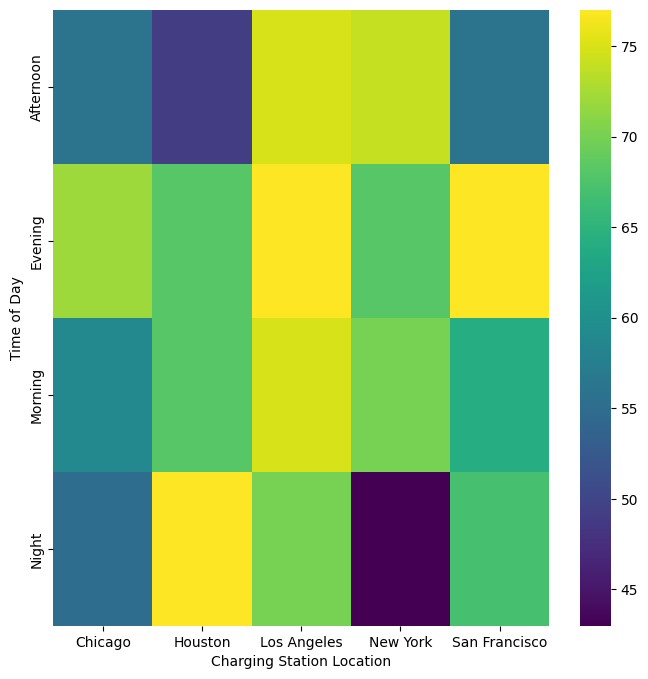

In [35]:
# @title Charging Station Location vs Time of Day

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Time of Day'].value_counts()
    for x_label, grp in data.groupby('Charging Station Location')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Charging Station Location')
_ = plt.ylabel('Time of Day')

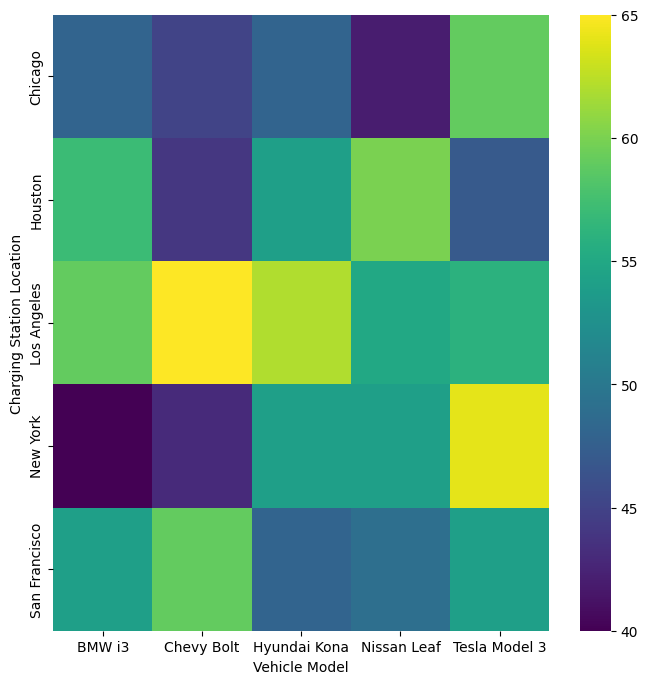

In [34]:
# @title Vehicle Model vs Charging Station Location

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Charging Station Location'].value_counts()
    for x_label, grp in data.groupby('Vehicle Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Vehicle Model')
_ = plt.ylabel('Charging Station Location')

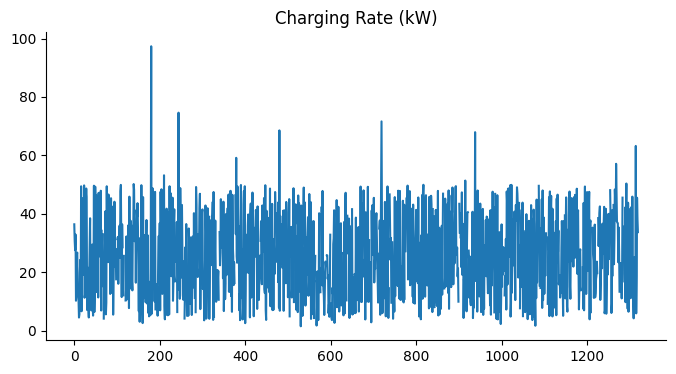

In [33]:
# @title Charging Rate (kW)

from matplotlib import pyplot as plt
data['Charging Rate (kW)'].plot(kind='line', figsize=(8, 4), title='Charging Rate (kW)')
plt.gca().spines[['top', 'right']].set_visible(False)

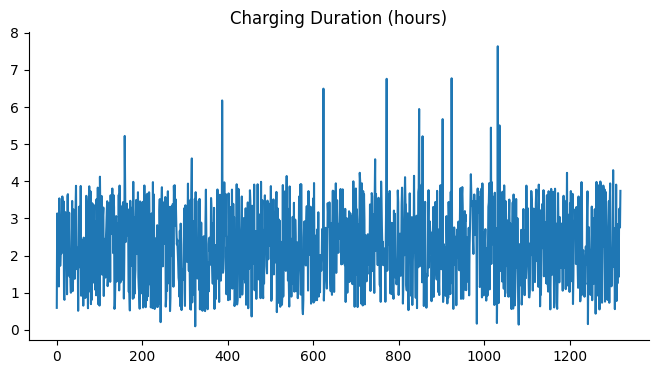

In [32]:
# @title Charging Duration (hours)

from matplotlib import pyplot as plt
data['Charging Duration (hours)'].plot(kind='line', figsize=(8, 4), title='Charging Duration (hours)')
plt.gca().spines[['top', 'right']].set_visible(False)

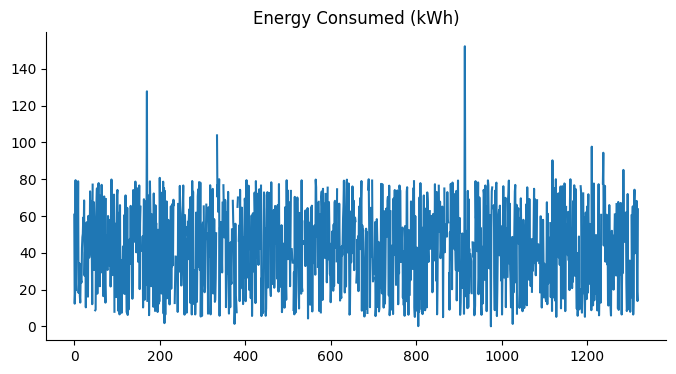

In [31]:
# @title Energy Consumed (kWh)

from matplotlib import pyplot as plt
data['Energy Consumed (kWh)'].plot(kind='line', figsize=(8, 4), title='Energy Consumed (kWh)')
plt.gca().spines[['top', 'right']].set_visible(False)

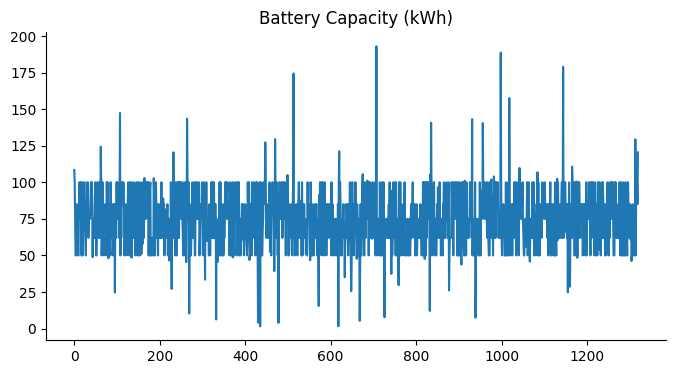

In [30]:
# @title Battery Capacity (kWh)

from matplotlib import pyplot as plt
data['Battery Capacity (kWh)'].plot(kind='line', figsize=(8, 4), title='Battery Capacity (kWh)')
plt.gca().spines[['top', 'right']].set_visible(False)

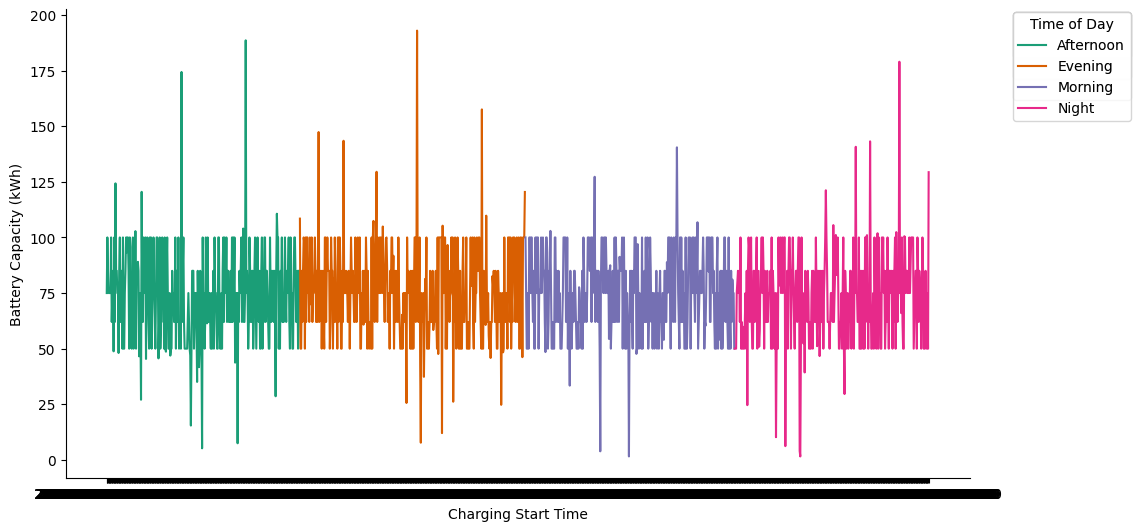

In [29]:
# @title Charging Start Time vs Battery Capacity (kWh)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Charging Start Time']
  ys = series['Battery Capacity (kWh)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Charging Start Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time of Day')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time of Day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Charging Start Time')
_ = plt.ylabel('Battery Capacity (kWh)')

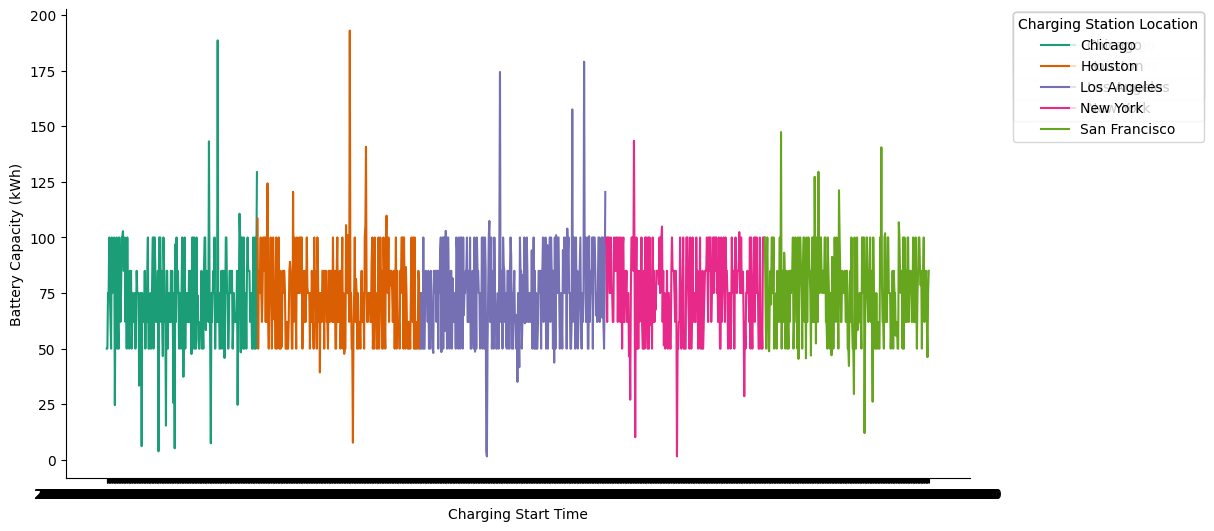

In [28]:
# @title Charging Start Time vs Battery Capacity (kWh)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Charging Start Time']
  ys = series['Battery Capacity (kWh)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Charging Start Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Charging Station Location')):
  _plot_series(series, series_name, i)
  fig.legend(title='Charging Station Location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Charging Start Time')
_ = plt.ylabel('Battery Capacity (kWh)')

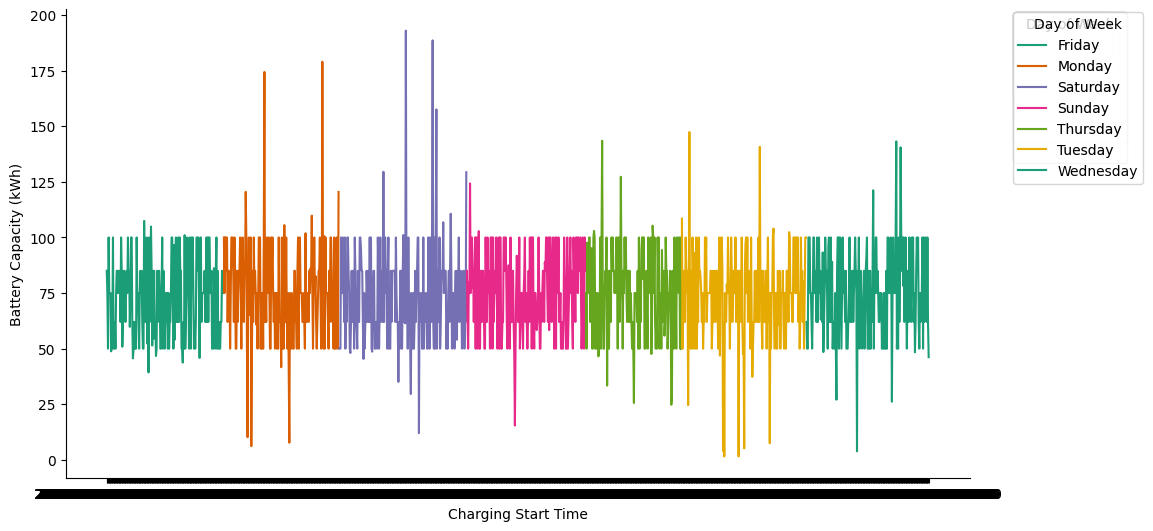

In [27]:
# @title Charging Start Time vs Battery Capacity (kWh)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Charging Start Time']
  ys = series['Battery Capacity (kWh)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Charging Start Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day of Week')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day of Week', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Charging Start Time')
_ = plt.ylabel('Battery Capacity (kWh)')

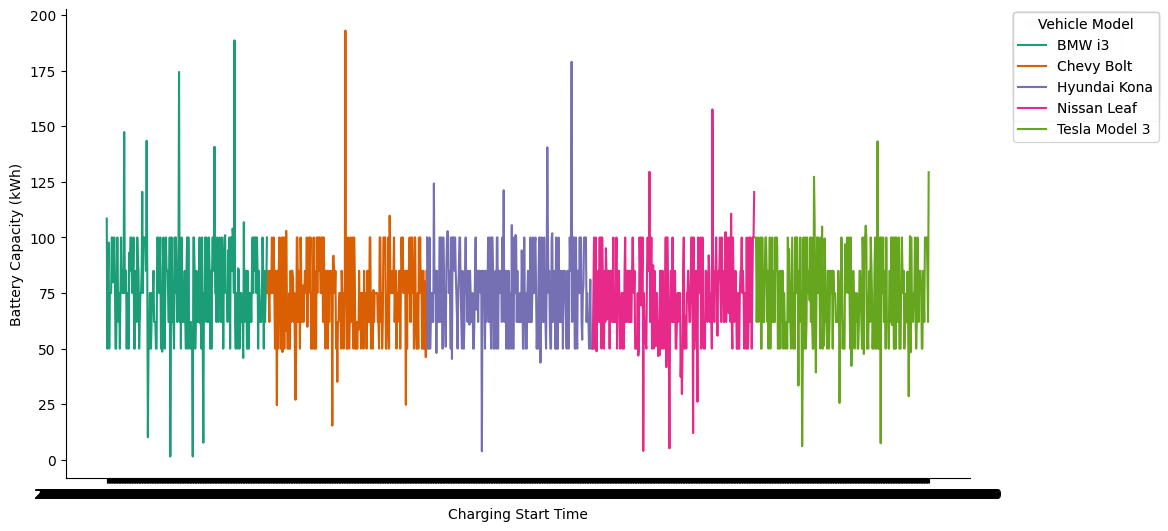

In [26]:
# @title Charging Start Time vs Battery Capacity (kWh)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Charging Start Time']
  ys = series['Battery Capacity (kWh)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Charging Start Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Vehicle Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Vehicle Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Charging Start Time')
_ = plt.ylabel('Battery Capacity (kWh)')

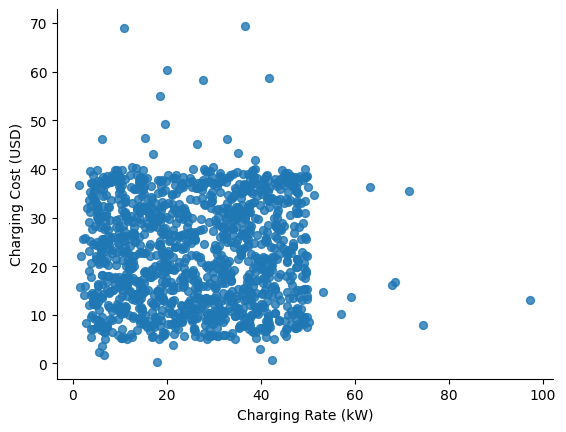

In [25]:
# @title Charging Rate (kW) vs Charging Cost (USD)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Charging Rate (kW)', y='Charging Cost (USD)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

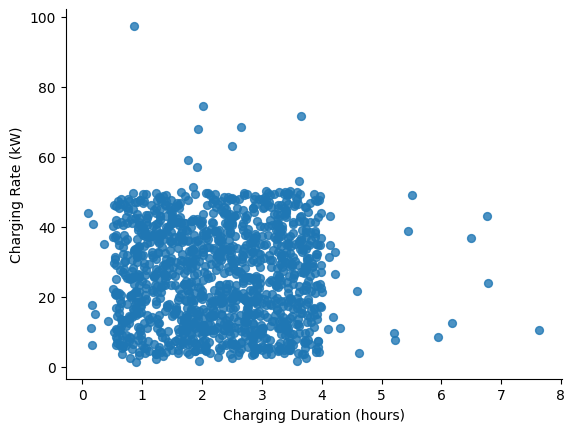

In [24]:
# @title Charging Duration (hours) vs Charging Rate (kW)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Charging Duration (hours)', y='Charging Rate (kW)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

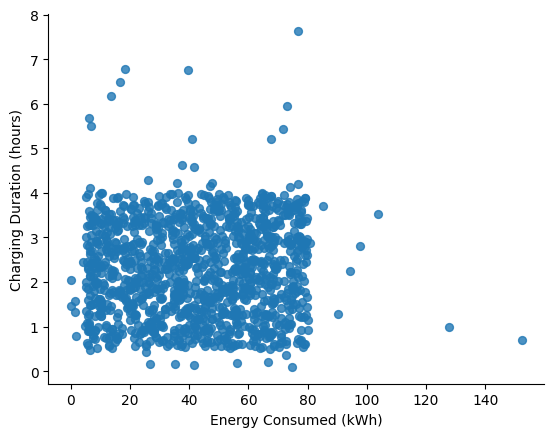

In [23]:
# @title Energy Consumed (kWh) vs Charging Duration (hours)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Energy Consumed (kWh)', y='Charging Duration (hours)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

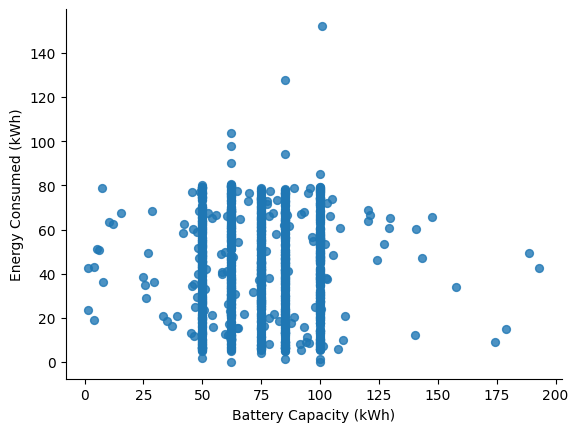

In [22]:
# @title Battery Capacity (kWh) vs Energy Consumed (kWh)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Battery Capacity (kWh)', y='Energy Consumed (kWh)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

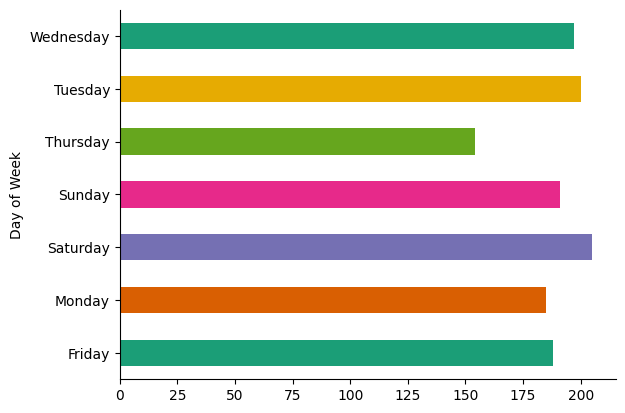

In [21]:
# @title Day of Week

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Day of Week').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

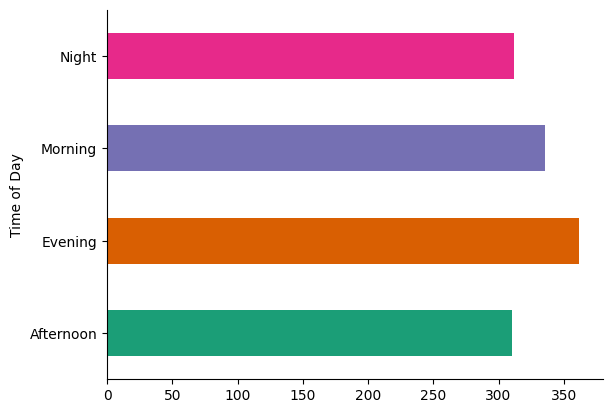

In [20]:
# @title Time of Day

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Time of Day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

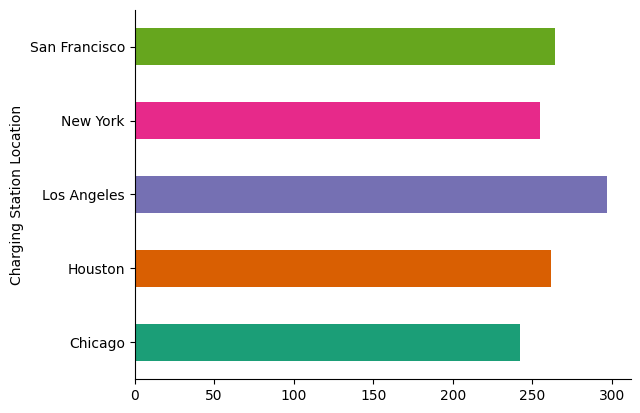

In [19]:
# @title Charging Station Location

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Charging Station Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

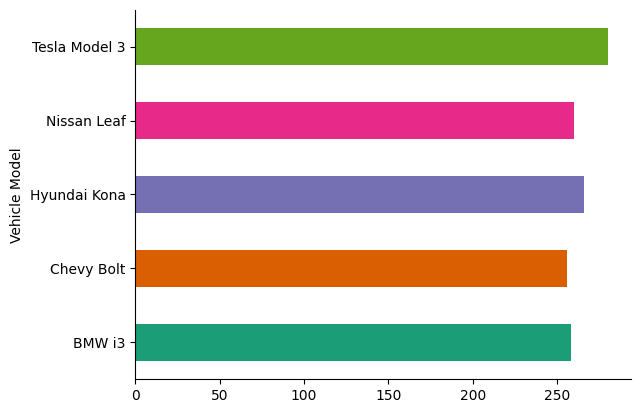

In [18]:
# @title Vehicle Model

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Vehicle Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

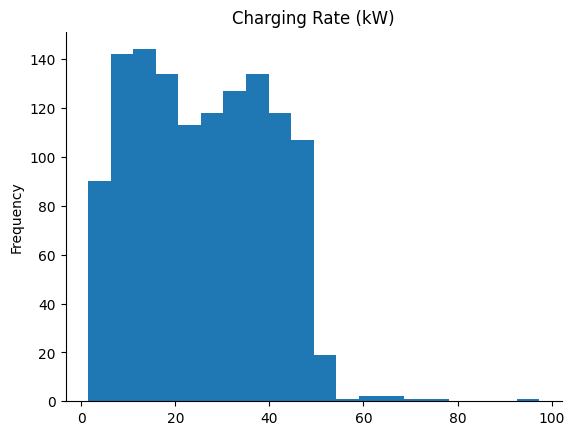

In [17]:
# @title Charging Rate (kW)

from matplotlib import pyplot as plt
data['Charging Rate (kW)'].plot(kind='hist', bins=20, title='Charging Rate (kW)')
plt.gca().spines[['top', 'right',]].set_visible(False)

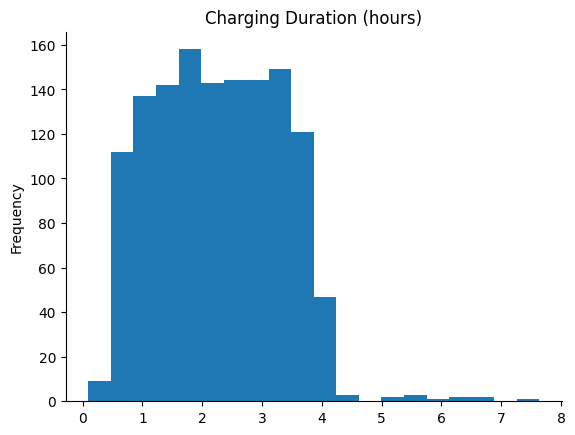

In [16]:
# @title Charging Duration (hours)

from matplotlib import pyplot as plt
data['Charging Duration (hours)'].plot(kind='hist', bins=20, title='Charging Duration (hours)')
plt.gca().spines[['top', 'right',]].set_visible(False)

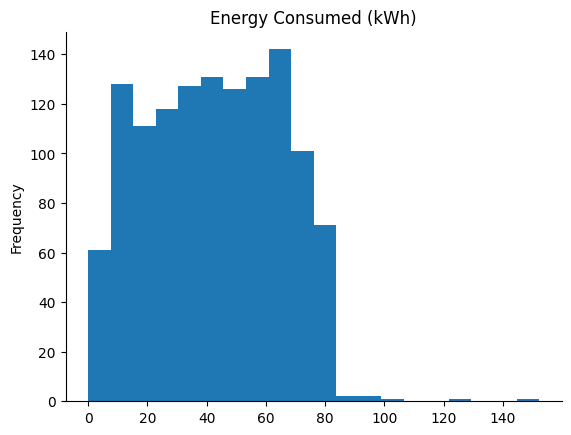

In [14]:
# @title Energy Consumed (kWh)

from matplotlib import pyplot as plt
data['Energy Consumed (kWh)'].plot(kind='hist', bins=20, title='Energy Consumed (kWh)')
plt.gca().spines[['top', 'right',]].set_visible(False)

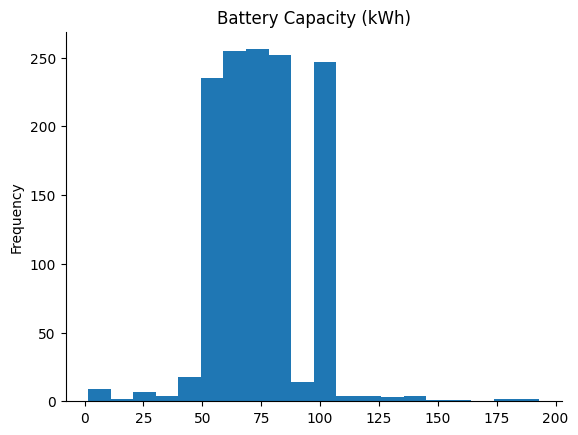

In [13]:
# @title Battery Capacity (kWh)

from matplotlib import pyplot as plt
data['Battery Capacity (kWh)'].plot(kind='hist', bins=20, title='Battery Capacity (kWh)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1xEf6wfgIEknH9y_o5liHY9wFcbpZIEpT1JCZVOaG64Y#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
# Report on EV Charging Data Insights

## Overview

This report analyzes a dataset of EV charging events, providing insights into charging patterns, usage trends, and potential areas for optimization. The analysis is based on various visualizations generated from the data, including violin plots, heatmaps, line plots, scatter plots, and bar charts.


## Key Findings

**Charging Behavior:**

* **Day of the week and time of day:** Charging activity exhibits distinct patterns depending on the day and time. Peak charging hours are observed during weekdays and evenings, likely due to commuters returning home or workplaces.
* **Charging station location:** Certain charging stations experience significantly higher usage than others, potentially due to factors like location accessibility, number of chargers, and available amenities.
* **Vehicle model:** The type of electric vehicle influences charging behavior. Certain vehicle models might have higher battery capacities or charging rates, influencing their charging durations and energy consumption.

**Charging Characteristics:**

* **Battery capacity:** The battery capacity of the EV plays a critical role in charging duration and energy consumption.
* **Charging rate:** The charging rate (kW) affects the total time taken to fully charge a vehicle.
* **Charging cost:**  Charging costs can be influenced by factors such as charging rate and energy consumption.

**Relationships between variables:**

* **Charging start time:** The data indicates a correlation between the time of charging and factors like location, day, and vehicle model. This reveals insight into the charging patterns of different EV models and location usage.
* **Charging duration and energy consumption:** There is a strong positive correlation between charging duration and energy consumed, as expected.
* **Battery capacity and energy consumed:** The capacity of the battery has a visible relationship with energy consumed, demonstrating how EVs with larger batteries utilize more energy.

## Potential Optimization Areas

Based on the analysis, several potential areas for optimization exist:

* **Load balancing:** Charging demand is uneven throughout the day and week. Smart charging strategies could help distribute demand better, optimizing grid stability and minimizing peak usage costs.
* **Charging station placement:** Optimal placement of new charging stations is vital to meet growing demand and ensure accessibility for all EV owners. Understanding geographic location usage patterns can guide infrastructure expansion plans.
* **Cost-saving strategies:**  Tailoring charging timings and locations based on energy pricing can reduce the overall cost of charging.


## Conclusion

The insights derived from this data analysis provide a comprehensive understanding of EV charging behaviors. These insights can inform decisions regarding charging infrastructure planning, operational strategies, and user optimization efforts, ultimately promoting a more sustainable and efficient transportation future.


